In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.models import Model
from keras.layers import Conv2D, Flatten, GlobalAveragePooling2D, Dense, Dropout, Input, \
BatchNormalization, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.applications import ResNet50
from sklearn.model_selection import train_test_split

In [25]:
train = pd.read_csv('./sign_mnist_train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [26]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [34]:
sign_count = train.label.nunique()
sign_lookup = np.eye(N=sign_count)
sign_lookup.shape

(24, 24)

In [36]:
y = np.array([sign_lookup[sign-1,] for sign in train.label])
y.shape

(27455, 24)

In [76]:
X = train.drop(columns=['label'])
X = np.array(X)
X = X.reshape(([-1, 28, 28, 1]))
X.shape

(27455, 28, 28, 1)

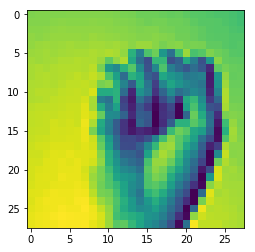

In [82]:
plt.imshow(X[20][:,:,0])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21964, 28, 28, 1), (5491, 28, 28, 1), (21964, 24), (5491, 24))

In [98]:
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], 1))

cnn = BatchNormalization()(inputs)
cnn = Conv2D(filters=16, strides=3, kernel_size=3, padding='same')(cnn)
cnn = Conv2D(filters=32, strides=3, kernel_size=3, padding='same')(cnn)
cnn = MaxPooling2D(pool_size=3, strides=3)(cnn)
cnn = GlobalAveragePooling2D()(cnn)

dense = Dense(32, activation='relu')(cnn)
dense = Dense(32, activation='relu')(cnn)
dense = Dense(sign_count, activation='softmax')(dense)

model = Model(inputs=inputs, outputs=dense)
model.summary()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 16)        160       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
global_average_pooling2d_12  (None, 32)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 32)                1056      
__________

In [99]:
model_performance = model.fit(X_train, y_train, batch_size=128, epochs=25, 
                              validation_data=[X_test, y_test], shuffle = True)

Train on 21964 samples, validate on 5491 samples
Epoch 1/25
21964/21964 [==============================] - 2s - loss: 2.6461 - acc: 0.2253 - val_loss: 2.1154 - val_acc: 0.3528

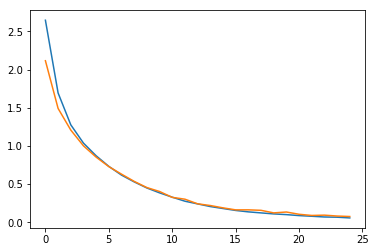

In [100]:
plt.plot(model_performance.history['loss'])
plt.plot(model_performance.history['val_loss'])
plt.show()